evaluation on simplebooll5. validation score > 89%

In [1]:
import numpy
import pandas
from matplotlib import pyplot

from data.dataimport import import_data
import data.tree
from encoders.baseencoder import AbstractEncoder
from data.tree import Node

In [2]:
ENCODER_PKL = "../rnnsupervisedencoder-largeSimpleBoolean5.pkl"
VALIDATION_DATA = "../expressions-synthetic/split/largeSimpleBoolean5-validationset.json.gz"
DATA = VALIDATION_DATA

In [3]:
encoder = AbstractEncoder.load(ENCODER_PKL)

In [4]:
data = import_data(DATA)

In [5]:
def flatten_data(data):
    flat = []
    for key, class_ in data.items():
        for item in [class_['original']] + class_['noise']:
            flat.append({
                'eq_class': key,
                'expression': item
            })
    return flat
    
flat = flatten_data(data)

In [6]:
def set_encoding(encoder, flat):
    for item in flat:
        item['encoding'] = encoder.get_encoding(item['expression'])

set_encoding(encoder, flat)

Compiling Methods...
Compilation Finished...


In [23]:
def get_false():
    literal = "f"
    false = Node("Start", ("child",), "False")
    and_ = Node("And", ("left", "right"), "False", parent=false)
    false.set_children_for_property("child", [and_])
    literal_node = Node(literal, (), literal, parent=and_)
    and_.set_children_for_property("right", [literal_node])
    not_literal_node = Node("Not", ("child",), "~" + literal, parent=and_)
    not_literal_node.set_children_for_property("child", [literal_node])
    and_.set_children_for_property("left", [not_literal_node])
    return '(~{})&{}'.format(literal, literal), false


print(get_false()[0])
print(str(get_false()[1]))

(~f)&f
-Start (False)
| \+child
|   \-And (False)
|     |+left
|     | \-Not (~f)
|     |   \+child
|     |     \-f (f)
|     \+right
|       \-f (f)



In [24]:
false_encoding = encoder.get_encoding(get_false())
false_encoding

array([-7.68363327e-02,  5.95367067e-02,  2.14718040e-02, -2.26870805e-01,
       -9.16755646e-02,  8.29663128e-02,  1.28783613e-01, -6.52640387e-02,
       -9.45298448e-02,  1.76330268e-01,  1.69713542e-01,  5.92775382e-02,
       -2.97895540e-03,  6.88235916e-04, -1.06058486e-01, -1.42795533e-01,
        8.65019038e-02,  3.15056965e-02,  8.25305954e-02,  2.61003571e-03,
       -3.44858947e-03, -1.80774331e-01, -2.28664512e-03,  3.05907670e-02,
        1.30324528e-01,  2.36829609e-01,  1.05150081e-01, -4.46014740e-02,
        1.78958565e-01,  2.70948648e-01,  3.70216966e-02,  5.60890846e-02,
       -2.26638272e-01, -1.08554170e-01,  2.11095840e-01,  2.32974425e-01,
       -1.71543345e-01, -1.07508652e-01,  2.22525783e-02, -8.39701295e-02,
        1.35314286e-01, -1.01890765e-01,  2.53924727e-01,  1.99016497e-01,
        1.25586301e-01, -2.28389297e-04,  3.54462974e-02, -2.07796261e-01,
        5.69529794e-02, -7.30430111e-02,  7.59216994e-02,  1.24604395e-02,
        6.65991902e-02, -

In [25]:
def set_dist_to_false(false_encoding, flat):
    def dist(x,y):   
        return numpy.sqrt(numpy.sum((x-y)**2))
    
    for item in flat:
        item['dist'] = dist(item['encoding'], false_encoding)
set_dist_to_false(false_encoding, flat)

In [26]:
def make_table(flat):
    return [{'eq_class': item['eq_class'],
             'expression': item['expression'][0],
             'dist': item['dist']} for item in flat]
table = make_table(flat)

In [27]:
pandas.set_option('max_rows', 700)
df = pandas.DataFrame(table)
df

,dist,eq_class,expression
0,1.364112,"And(a, j)","[(, j, |, j, ), &, a]"
1,1.294260,"And(a, j)","[a, &, j]"
2,1.219491,"And(a, j)","[j, &, (, a, &, a, )]"
3,1.290621,"Or(d, j)","[(, j, &, j, ), |, d]"
4,1.233691,"Or(d, j)","[(, j, |, j, ), |, d]"
5,1.214198,"Or(d, j)","[(, j, |, d, ), |, d]"
6,1.325942,"Or(a, f)","[(, a, |, f, ), |, f]"
7,1.405883,"Or(a, f)","[~, (, ~, (, a, |, f, ), )]"
8,1.331903,"Or(a, f)","[(, a, |, f, ), |, a]"
9,1.243530,"And(c, e, h)","[(, h, &, e, ), &, c]"


In [28]:
@numpy.vectorize
def bucketise(num):
    BUCKET_NUM = 20
    return numpy.floor(num / 2 * BUCKET_NUM)

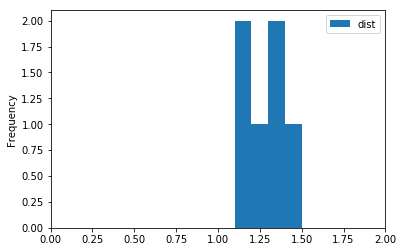

In [29]:
df[df.eq_class == 'False'].plot.hist(xlim=(0, 2), bins=numpy.linspace(0, 2, 21))

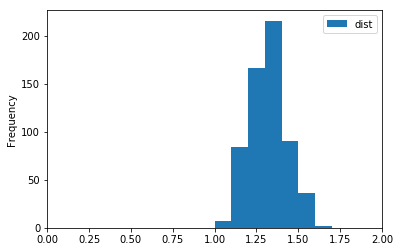

In [30]:
df[df.eq_class != 'False'].plot.hist(xlim=(0, 2), bins=numpy.linspace(0, 2, 21))